Week 6 · Day 1 — Optimization (SGD, Adam)
Why this matters

Optimization algorithms determine how fast and how well your neural network learns. Choosing the right optimizer (and tuning it) is critical for training stability and accuracy.

Theory Essentials

Gradient Descent: update weights to reduce loss.

Update rule: 
w←w−η⋅∇L(w).

Variants:

Batch GD: full dataset each step (slow).

Stochastic GD (SGD): one sample per step (noisy, but fast).

Mini-batch GD: compromise (standard in practice).

Momentum: adds “inertia” → faster convergence, avoids oscillations.

Adam: adaptive learning rates per parameter; usually fast and stable.

SGD often generalizes better, Adam is great for speed/experiments.

Training SGD
Epoch 1: loss=0.7577
Epoch 2: loss=0.2741
Epoch 3: loss=0.2088
Epoch 4: loss=0.1668
Epoch 5: loss=0.1359
Epoch 6: loss=0.1165
Epoch 7: loss=0.1001
Epoch 8: loss=0.0871
Epoch 9: loss=0.0775
Epoch 10: loss=0.0685
Training Adam
Epoch 1: loss=0.4334
Epoch 2: loss=0.1768
Epoch 3: loss=0.1242
Epoch 4: loss=0.0972
Epoch 5: loss=0.0755
Epoch 6: loss=0.0633
Epoch 7: loss=0.0527
Epoch 8: loss=0.0449
Epoch 9: loss=0.0360
Epoch 10: loss=0.0310


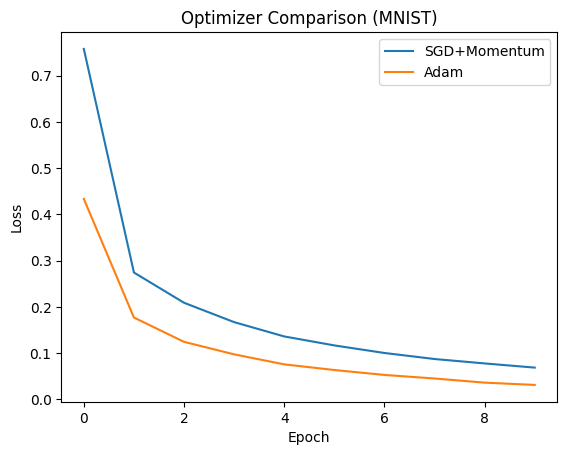

In [ ]:
# Setup
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(42)

# ---------- Data ----------
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# ---------- Model ----------
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# ---------- Train function ----------
def train_model(optimizer_type="SGD", epochs=3):
    print("Training", optimizer_type)
    model = SimpleNet()
    criterion = nn.CrossEntropyLoss()
    if optimizer_type=="SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses = []
    for epoch in range(epochs):
        total_loss=0
        for X,y in train_loader:
            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred,y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss/len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}: loss={avg_loss:.4f}")
    return losses

# ---------- Run both ----------
sgd_losses = train_model("SGD", epochs=10)
adam_losses = train_model("Adam", epochs=10)

plt.plot(sgd_losses, label="SGD+Momentum")
plt.plot(adam_losses, label="Adam")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.title("Optimizer Comparison (MNIST)")
plt.show()


1) Core (10–15 min)
Task: Train each optimizer for 10 epochs. Which one converges faster?

Adam convereges faster as it is always below the SGD line.

2) Practice (10–15 min)
Task: Try different learning rates (0.1, 0.01, 0.001) for SGD. Which one diverges, which is too slow?

Training SGD lr: 0.1
Epoch 1: loss=0.3312
Epoch 2: loss=0.1133
Epoch 3: loss=0.0807
Epoch 4: loss=0.0653
Epoch 5: loss=0.0515
Training SGD lr: 0.01
Epoch 1: loss=0.7767
Epoch 2: loss=0.2741
Epoch 3: loss=0.2064
Epoch 4: loss=0.1637
Epoch 5: loss=0.1341
Training SGD lr: 0.001
Epoch 1: loss=2.1972
Epoch 2: loss=1.3726
Epoch 3: loss=0.6677
Epoch 4: loss=0.4864
Epoch 5: loss=0.4164


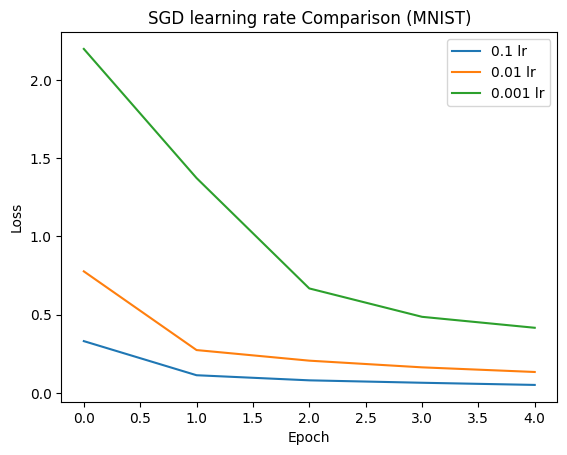

In [6]:
def different_lr(learning_rate):
    print("Training SGD lr:", learning_rate)
    model = SimpleNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    epochs = 5

    losses = []
    for epoch in range(epochs):
        total_loss=0
        for X,y in train_loader:
            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred,y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss/len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}: loss={avg_loss:.4f}")
    
    return losses

losses_01 = different_lr(0.1)
losses_001 = different_lr(0.01)
losses_0001 = different_lr(0.001)

plt.plot(losses_01, label="0.1 lr")
plt.plot(losses_001, label="0.01 lr")
plt.plot(losses_0001, label="0.001 lr")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.title("SGD learning rate Comparison (MNIST)")
plt.show()


A higher learning rate (0.1) made training much faster and reached lower loss within 5 epochs.

Too small a learning rate (0.001) trains too slowly and may require many more epochs to catch up.

The “sweet spot” is often found by balancing speed (high lr) with stability (avoiding overshooting).

In this example it cant be appreciated but if the lr is too high the curve may bounce or even increase over epochs.

3) Stretch (optional, 10–15 min)
Task: Replace SGD momentum=0.9 with momentum=0.0. Compare curves.

Training SGD momentum: 0
Epoch 1: loss=2.1795
Epoch 2: loss=1.2867
Epoch 3: loss=0.6700
Epoch 4: loss=0.5072
Epoch 5: loss=0.4322
Training SGD momentum: 0.9
Epoch 1: loss=0.7526
Epoch 2: loss=0.2717
Epoch 3: loss=0.2026
Epoch 4: loss=0.1609
Epoch 5: loss=0.1322


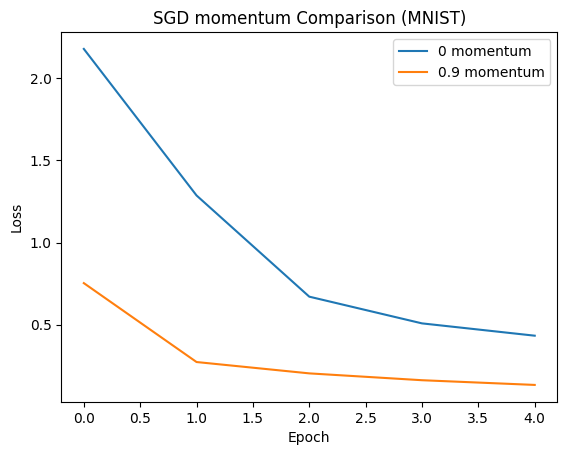

In [7]:
def different_momentum(momentum):
    print("Training SGD momentum:", momentum)
    model = SimpleNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=momentum)
    epochs = 5

    losses = []
    for epoch in range(epochs):
        total_loss=0
        for X,y in train_loader:
            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred,y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss/len(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}: loss={avg_loss:.4f}")
    
    return losses

momentum_0 = different_momentum(0)
momentum_09 = different_momentum(0.9)


plt.plot(momentum_0, label="0 momentum")
plt.plot(momentum_09, label="0.9 momentum")

plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.title("SGD momentum Comparison (MNIST)")
plt.show()

Adding momentum makes SGD train faster and reach a lower loss in the same number of epochs. It helps the optimizer escape small valleys and smooths the path toward convergence.

Mini-Challenge (≤40 min)

Task: Train the same MNIST model with Adam and SGD (10 epochs each).
Acceptance Criteria:

Plot training loss + validation accuracy for both.

Compare in 3–4 sentences: speed vs final accuracy.

Note: Does Adam overfit faster than SGD?

Training SGD
Epoch 1: loss=0.8845, val_acc=0.896
Epoch 2: loss=0.3004, val_acc=0.917
Epoch 3: loss=0.2326, val_acc=0.936
Epoch 4: loss=0.1860, val_acc=0.944
Epoch 5: loss=0.1549, val_acc=0.953
Epoch 6: loss=0.1309, val_acc=0.956
Epoch 7: loss=0.1137, val_acc=0.960
Epoch 8: loss=0.1013, val_acc=0.964
Epoch 9: loss=0.0886, val_acc=0.966
Epoch 10: loss=0.0791, val_acc=0.967
Training Adam
Epoch 1: loss=0.4591, val_acc=0.935
Epoch 2: loss=0.1862, val_acc=0.946
Epoch 3: loss=0.1355, val_acc=0.959
Epoch 4: loss=0.1052, val_acc=0.963
Epoch 5: loss=0.0848, val_acc=0.968
Epoch 6: loss=0.0694, val_acc=0.968
Epoch 7: loss=0.0579, val_acc=0.967
Epoch 8: loss=0.0483, val_acc=0.972
Epoch 9: loss=0.0416, val_acc=0.973
Epoch 10: loss=0.0334, val_acc=0.973


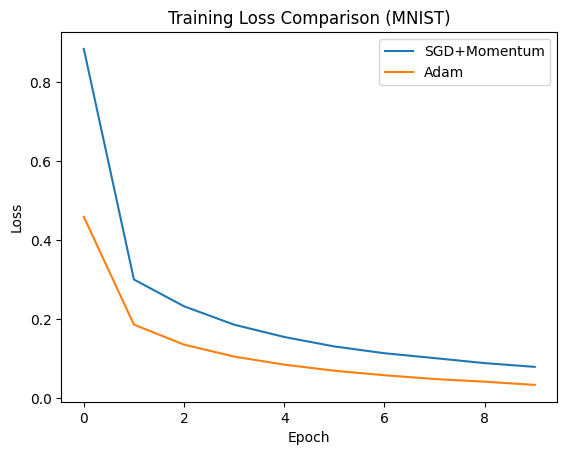

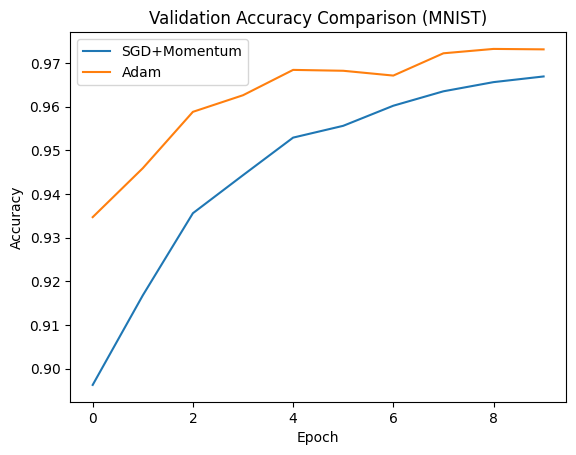

In [9]:
from torch.utils.data import random_split
# ---------- Data ----------
transform = transforms.Compose([transforms.ToTensor()])
full_train = datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Split: train (50k) + val (10k)
train_data, val_data = random_split(full_train, [50000, 10000])
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_data,   batch_size=1000, shuffle=False)

def train_model2(optimizer_type="SGD", epochs=10):
    print("Training", optimizer_type)
    model = SimpleNet()
    criterion = nn.CrossEntropyLoss()
    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses, val_accs = [], []

    for epoch in range(epochs):
        # ---- Train ----
        model.train()
        total_loss = 0.0
        for X, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)

        # ---- Validate ----
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for X, y in val_loader:
                logits = model(X)
                preds = logits.argmax(1)
                correct += (preds == y).sum().item()
                total   += y.size(0)
        val_acc = correct / total
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}: loss={avg_loss:.4f}, val_acc={val_acc:.3f}")

    return losses, val_accs

# ---------- Run both ----------
sgd_losses,  sgd_accs  = train_model2("SGD",  epochs=10)
adam_losses, adam_accs = train_model2("Adam", epochs=10)

# ---------- Plots ----------
# Training loss
plt.plot(sgd_losses,  label="SGD+Momentum")
plt.plot(adam_losses, label="Adam")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Training Loss Comparison (MNIST)")
plt.legend(); plt.show()

# Validation accuracy
plt.plot(sgd_accs,  label="SGD+Momentum")
plt.plot(adam_accs, label="Adam")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Validation Accuracy Comparison (MNIST)")
plt.legend(); plt.show()

Speed: Adam converges faster than SGD+Momentum — both the training loss drops more steeply early on, and the validation accuracy rises quicker.

Final accuracy: Adam also reaches a slightly higher validation accuracy (~97.5%) compared to SGD (~96.7%).

Overfitting: There’s a mini overfitting signal in Adam's between 4-6.

✅ Conclusion: Adam trains quicker and achieves slightly better final performance than SGD+Momentum on this MNIST setup, without obvious overfitting.

Notes / Key Takeaways

Optimizer choice matters a lot for speed and generalization.

Adam = fast convergence, good default.

SGD + momentum = often better generalization on big datasets.

Learning rate is the most critical hyperparameter.

Always monitor both training loss and validation accuracy.

Reflection

Why might Adam converge faster but generalize worse than SGD?

Why is learning rate more important than optimizer choice?

1. Why might Adam converge faster but generalize worse than SGD?
Adam adapts the learning rate for each parameter, so it makes big early progress and converges quickly. But that same aggressiveness can push it into sharp minima that fit training data very well but generalize less to unseen data. SGD, being slower and noisier, often finds flatter minima that generalize better.

2. Why is learning rate more important than optimizer choice?
The learning rate controls the size of every update and directly shapes convergence. A bad learning rate (too high or too low) can make any optimizer fail, while a good one often makes even plain SGD work well. Optimizers fine-tune the path, but learning rate sets the pace of learning.